# Graph

/Users/fracapuano/miniconda3/envs/signalenv/lib/python3.12/site-packages/pygsp/plotting.py:610: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sc = ax.scatter(


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Minnesota(n_vertices=2642, n_edges=3304, connected=True)'}>)

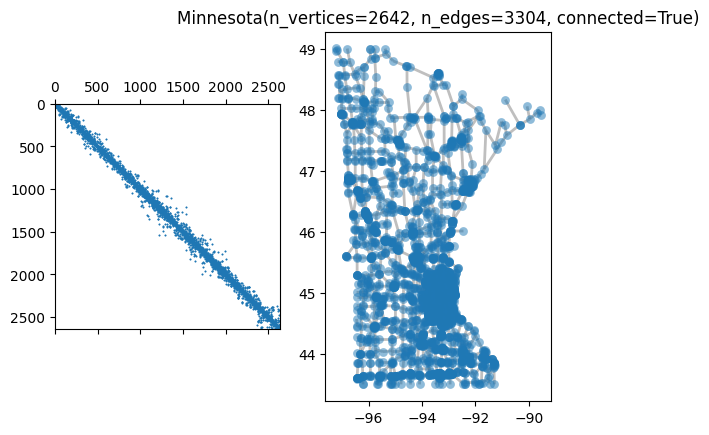

In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting

G = graphs.Minnesota()
G.coords.shape # coordinates are already set for nodes for visualisation
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=0.5) # visualise the adjacency matrix in a spy plot
G.plot(ax=axes[1]) # visualise the graph in 2D coordinates

# Graph Laplacian

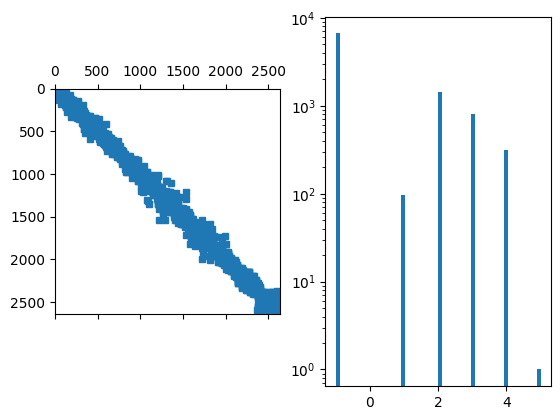

In [7]:
G.compute_laplacian("combinatorial")
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=5)
axes[1].hist(G.L.data, bins=50, log=True);

> Can you observe the difference between W and L from their spy plots?

Because $ L = D - W $ the sparsity pattern in the Laplacian matrix is similar to that of $ W $, with the exception that $ L $ is _diagonally dominant_: a particularly helpful property which aides with spectral caracterizations of L.

> Can you understand the histogram for the entries of L?

In [32]:
print(int(G.W.min()), int(G.W.max()))

0 1


Because $ L $ is derived from $ W \equiv A : A_{ij} = \mathbf 1_{e_{ij} \in \mathcal E}) $ (adjency matrix), entries are all integers (hence the laplacian is termed combinatorial). The majority of the entries in $ W $ 0, which according to the definition of $L$ gets mapped to $-1$ (the bulk of the Laplacian ditribution). Large values of the laplacian entries ($\geq 2$) indicate highly connected nodes with multiple neighbors.

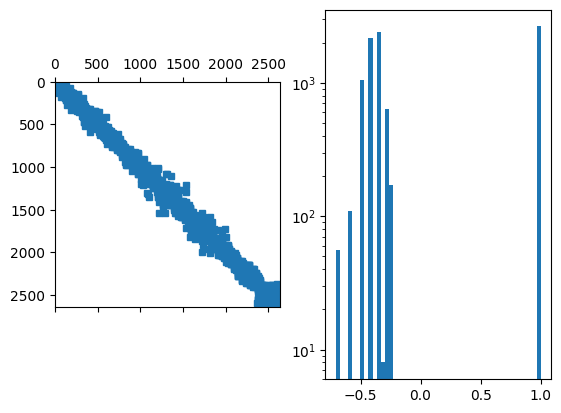

In [27]:
G.compute_laplacian("normalized")
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=5)
axes[1].hist(G.L.data, bins=50, log=True);

> Can you understand the histogram for the entries of L?

The normalized laplacian normalizes by the degree of each node. This reduces the bias agains nodes with less connections. As a result, the distribution of the Laplacian entries contains values that are scaled down by the neighbourhood size of each node. This helps making the matrix less skewed towards large values

# Graph Signal

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Ring(n_vertices=60, n_edges=60, k=1)'}>)

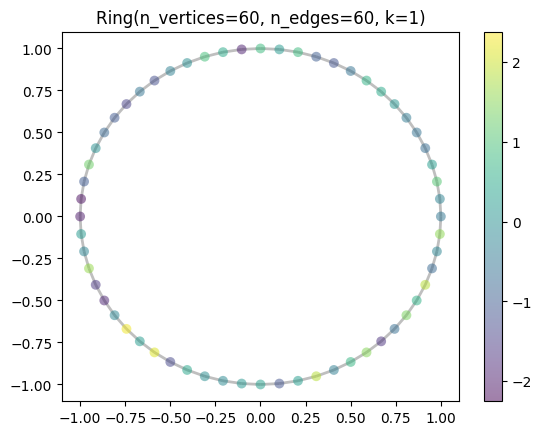

In [33]:
G = graphs.Ring(N=60)
f = np.random.normal(size=G.N)
G.plot_signal(f, vertex_size=50)

In [36]:
print("Laplacian quadratic form for f: ",f.T @ G.L @ f)

f_sorted = np.sort(f)
print("Laplacian quadratic form for f: ",f_sorted.T @ G.L @ f_sorted)

Laplacian quadratic form for f:  131.14434237125033
Laplacian quadratic form for f:  20.00789627349586


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Ring(n_vertices=60, n_edges=60, k=1)'}>)

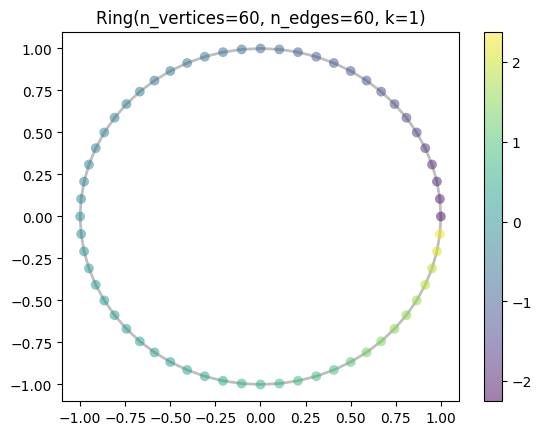

In [37]:
G.plot_signal(f_sorted, vertex_size=50)


> Compute the Laplacian quadratic form for f. Now sort the values in f in increasing order and compute the Laplacian quadratic form again. How do the two quantities compare, and why? (Note: You can plot both the original and sorted signals on the graph and compare.)

The Laplacian quadratic form with a sorted signal is reduced versus the unsorted signal as a direct consequence of the smoother value transitions. In this, $ f^T L f$ captures the smoothness (i.e., frequency) of the changes in values on the graph for a given signal $f$.

> This simple ‘sorting trick’ does not always make the signal smoother on an arbitrary graph. Can you see why?

[Hunch] If the graph is not fully-connected then it is not possible to observe such smooth transitions

# Fourier basis

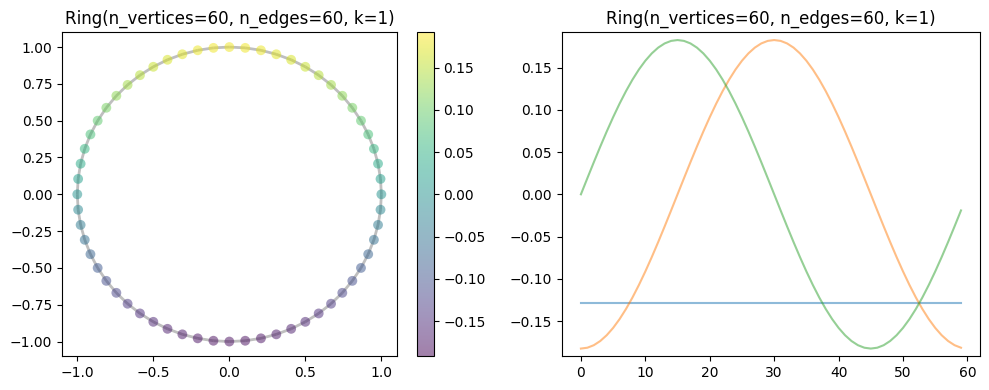

In [38]:
G.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(G.U[:, 2], vertex_size=50, ax=axes[0])  # the 3rd eigenvector as a signal on the graph
G.set_coordinates('line1D')
G.plot_signal(G.U[:, 0:3], ax=axes[1])  # the first three eigenvectors on the real line
fig.tight_layout()

> Can you observe the equivalence between the classical Fourier basis and the Fourier basis defined on the ring graph?

Yes. Eigenvectors corresponding to increasing eigenvalues correspond to increasing frequencies.

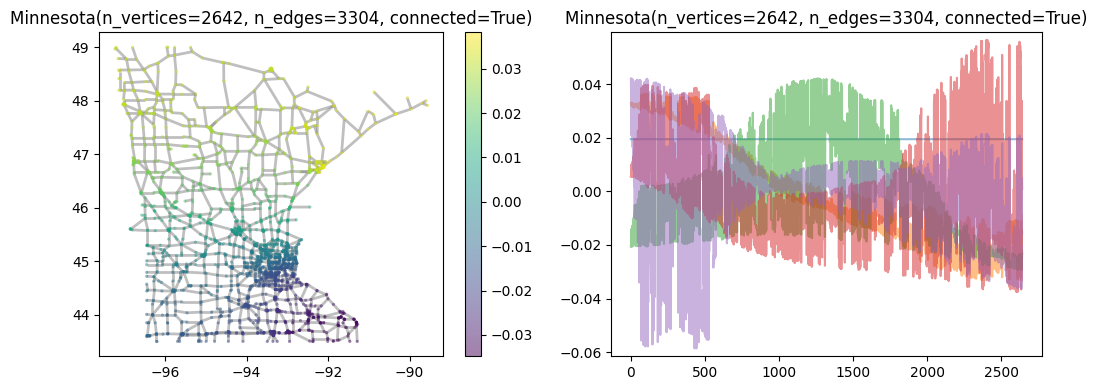

In [43]:
# switching from a ring graph to the Minnesota Graph
G = graphs.Grid2d(10, 10)
G = graphs.Minnesota()

G.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(G.U[:, 1], vertex_size=5, ax=axes[0])  # the 3rd eigenvector as a signal on the graph
G.set_coordinates('line1D')
G.plot_signal(G.U[:, 0:5], ax=axes[1])  # the first 5 eigenvectors on the real line
fig.tight_layout()

> What do you observe about these eigenvectors?

These eigenvectors are not as clean as the ring graph, as a direct consequence of the graph's topology. In this context, the first non-zero eigenvalue corresponds to an eigenfunction with a relatively high frequency compared to that of the first eigenvector of the ring graph.

> Compute the Laplacian quadratic form for the first 5 eigenvectors of the 2D grid graph and the Minnesota road network. How do the quantities vary, and why?

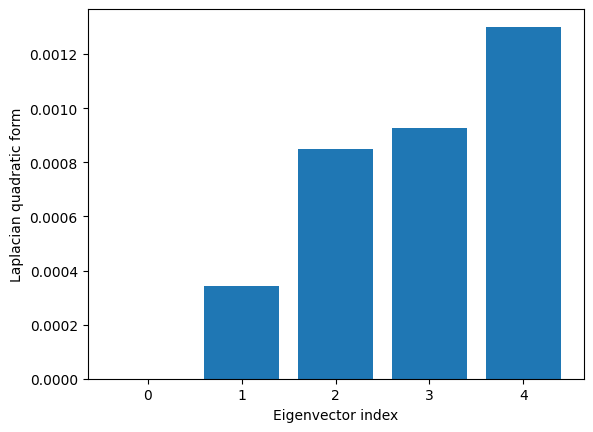

In [67]:
G.compute_laplacian("normalized")
n = 5

fig, ax = plt.subplots()

ax.bar(np.arange(n), np.diag(G.U[:, 0:n].T @ G.L @ G.U[:, 0:n]))
ax.set_xticks(np.arange(n))
ax.set_xticklabels(np.arange(n))
ax.set_xlabel("Eigenvector index")
ax.set_ylabel("Laplacian quadratic form")
plt.show()

Is the same value as the eigenvalues! Indeed $ L = U^T \Delta U \implies (U^T L U)^T = U^T L U = \Delta $, as the eigenbasis is always considered to be orthonormal $UU^T = I$ and the eigenvalue matrix $\Delta $ is diagonal.

In [68]:
eigs, _ = np.linalg.eigh(G.L.toarray())

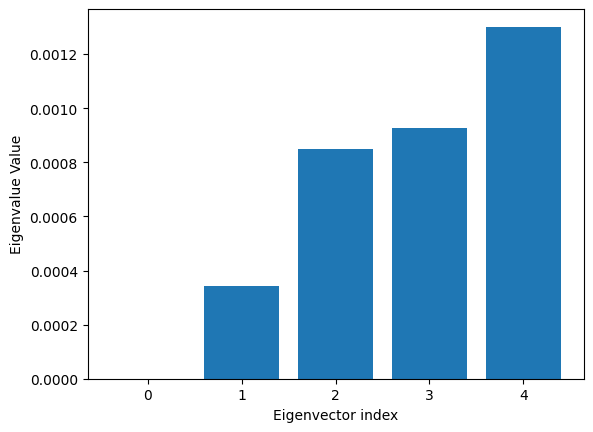

In [69]:
fig, ax = plt.subplots()

ax.bar(np.arange(n), eigs[:n])
ax.set_xticks(np.arange(n))
ax.set_xticklabels(np.arange(n))
ax.set_xlabel("Eigenvector index")
ax.set_ylabel("Eigenvalue Value")
plt.show()

# Graph Fourier transform (GFT)

2025-10-21 15:39:37,578:[INFO](pygsp.graphs.community.__init__): Constructed using community density = 0.2


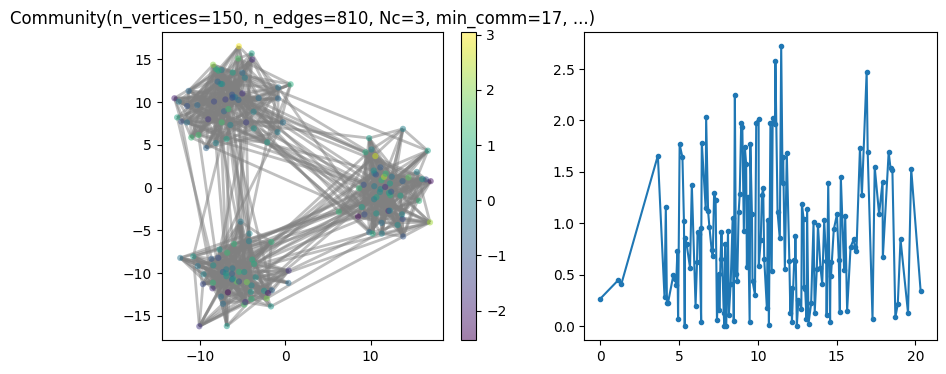

In [70]:
communities = [50, 50, 50]
# `comm_density` and `world_density` determines intra- and inter-community edge probability
G = graphs.Community(N=150, Nc=3, comm_sizes=communities, comm_density=0.2, world_density=0.01)
f = np.random.normal(size=G.N)
G.compute_fourier_basis()
f_hat = G.gft(f)
limits = [np.min(f)-0.1, np.max(f)+0.1]
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(f, vertex_size=20, ax=axes[0], limits=limits)
axes[1].plot(G.e, np.abs(f_hat), ".-")

> Can you comment on the smoothness of f on the graph, from its Fourier coefficients?

The signal is not smooth at all, as it lacks homogeneity within each individual component and varies rather starkly. The fourier coefficients also show this illustrating non-negligible magnitude coefficients for possibly high-frequency components.

Text(0, 0.5, 'Magnitude')

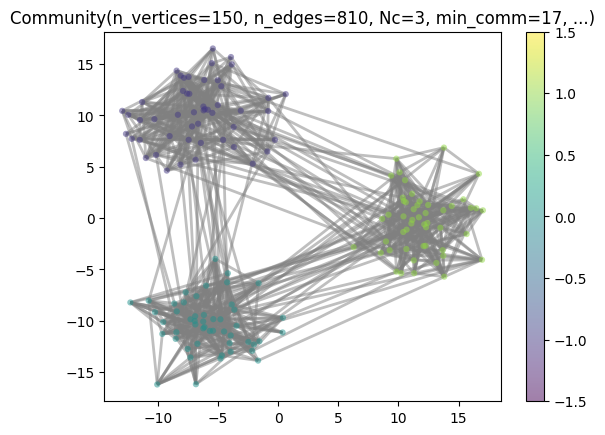

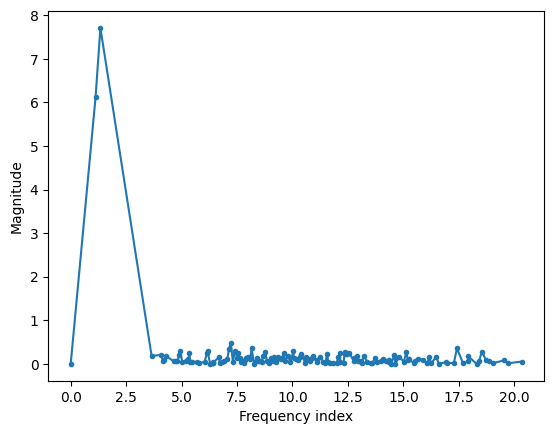

In [71]:
fp = np.zeros(G.N)
fp[:communities[0]] = -1 * np.ones(communities[0])
fp[-communities[-1]:] = 1 * np.ones(communities[-1])
G.plot_signal(fp, vertex_size=20, limits=[-1.5, 1.5])
f_hat_p = G.gft(fp)
fig, ax = plt.subplots()
ax.plot(G.e, np.abs(f_hat_p), ".-")
ax.set_xlabel("Frequency index")
ax.set_ylabel("Magnitude")

> Plot both f and fpart on the graph. What do you observe?

Segregation and lack-of of the signal in the different communities, using  `f_part` and `f` respectively.

> Compute the Fourier coefficients of fpart and compare with that of f. What do you observe, and why?

The frequency coefficients for the partitioned signal, being the graph's coloring/response much smoother, can be neglected for high-frequency components, with the majority of the weights being allocated to low-frequency components.

> Compare the Laplacian quadratic form of f and fpart. Is it consistent with what you observe above? (Note: For a fair comparison, you should divide the Laplacian quadratic form by the squared norm of the signal.)

In [73]:
print("Original signal: ", f.T @ G.L @ f / np.linalg.norm(f)**2)
print("Partitioned signal: ", fp.T @ G.L @ fp / np.linalg.norm(fp)**2)


Original signal:  11.127254964548957
Partitioned signal:  1.53


The Laplacian quadratic form also captures the smoother nature of the partitioned signal (intra-community, as the signal's variations are rather steep inter communities)

# Filtering

In [74]:
import copy
fb_hat = copy.deepcopy(f_hat)
fb_hat[20:] = 0  # this corresponds to an ideal brick-wall low-pass filtering
fb = G.igft(fb_hat)

> Plot both the original signal f and the filtered signal fbrick on the graph. What do you observe?

Text(0, 0.5, 'Magnitude')

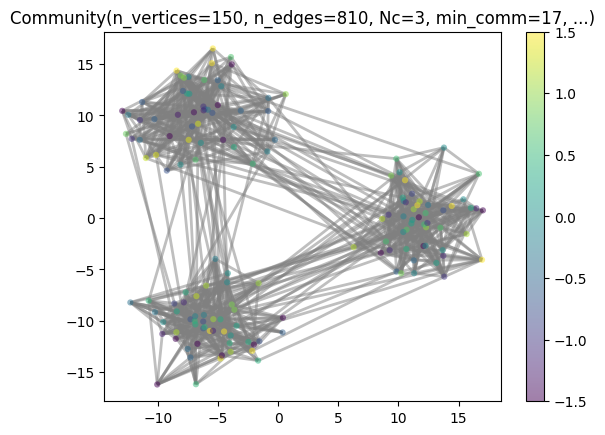

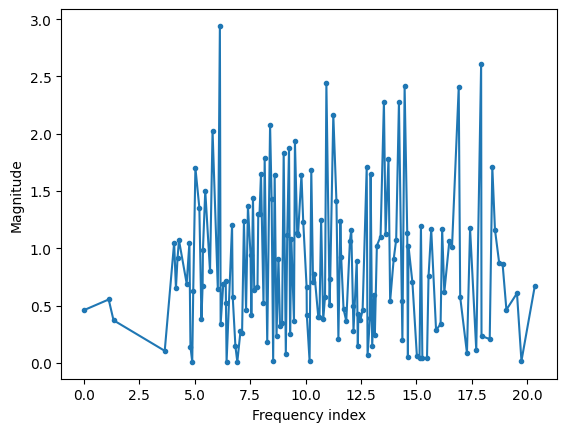

In [78]:
G.plot_signal(f, vertex_size=20, limits=[-1.5, 1.5])
fig, ax = plt.subplots()
ax.plot(G.e, np.abs(f), ".-")
ax.set_xlabel("Frequency index")
ax.set_ylabel("Magnitude")

Text(0, 0.5, 'Magnitude')

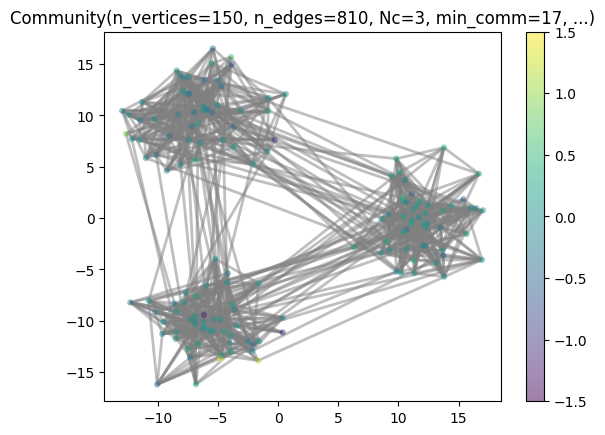

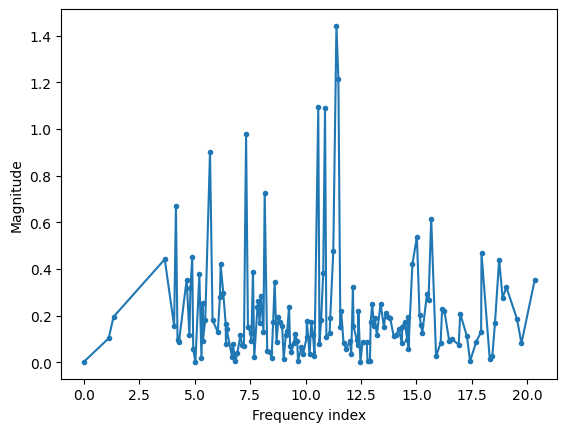

In [76]:
G.plot_signal(fb, vertex_size=20, limits=[-1.5, 1.5])
fig, ax = plt.subplots()
ax.plot(G.e, np.abs(fb), ".-")
ax.set_xlabel("Frequency index")
ax.set_ylabel("Magnitude")

> Plot both the original signal f and the filtered signal fbrick on the graph. What do you observe?

The application of the brick-wall low-pass filter attenuates the higher frequency components, although the signal is very much non-smooth still. This motivates looking into other, different kinds of filters.

(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Heat(in=1, out=1, scale=[10.00], normalize=False)'}, xlabel="laplacian's eigenvalues (graph frequencies) $\\lambda$", ylabel='filter response $g(\\lambda)$'>)

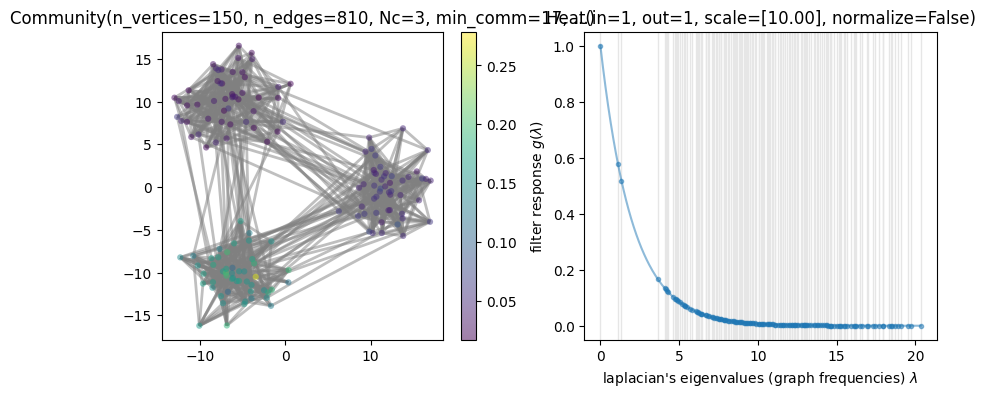

In [79]:
tau = 10
delta = 60  # define a Kronecker delta function having value 1 on node 60 and 0 elsewhere
g = filters.Heat(G, tau)  # the heat kernel defined via the graph spectral domain
s = g.localize(delta)  # the heat kernel localised at node 60 in the graph
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(s, vertex_size=20, ax=axes[0])
g.plot(ax=axes[1])

In [80]:
fh = g.filter(f)

> Verify that localising the heat kernel at a particular node is equivalent to applying filtering to the corresponding Kronecker delta function



100%|██████████| 100/100 [00:00<00:00, 829.52it/s]


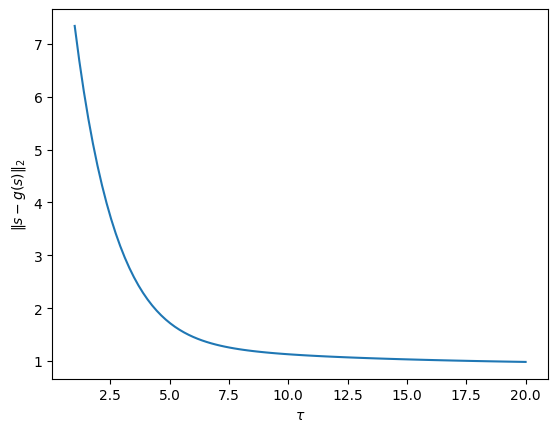

In [103]:
from tqdm import tqdm
tau = 10

def diffuse_heat(tau):
    deltas = np.zeros(G.N)
    # define a Kronecker delta function having value 1 on node 60 and 0 elsewhere
    delta = 60
    deltas[delta-1] = 1

    g = filters.Heat(G, tau)  # the heat kernel defined via the graph spectral domain
    s = g.localize(delta)  # the heat kernel localised at node 60 in the graph

    return np.linalg.norm(g.filter(deltas) - s)

taus = np.linspace(1, 20, 100)
differences = []
for tau in tqdm(taus):
    differences.append(diffuse_heat(tau))

plt.plot(taus, differences)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\Vert s - g(s) \Vert_2$")
plt.show()


> Plot the original signal f, the filtered signal fbrick by the brick-wall low-pass filter, and the filtered signal fheat by the heat kernel on the graph. How do the two filtered signals compare?

Text(0, 0.5, 'Magnitude')

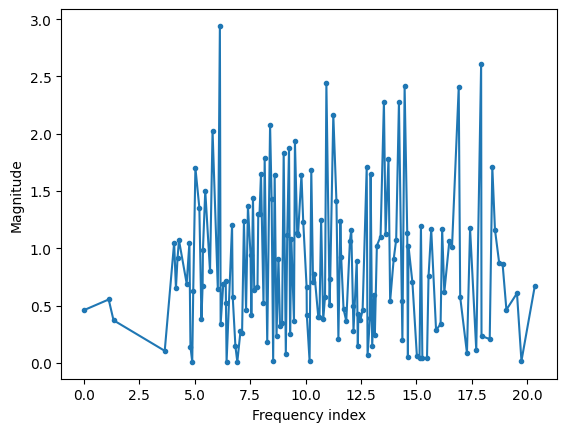

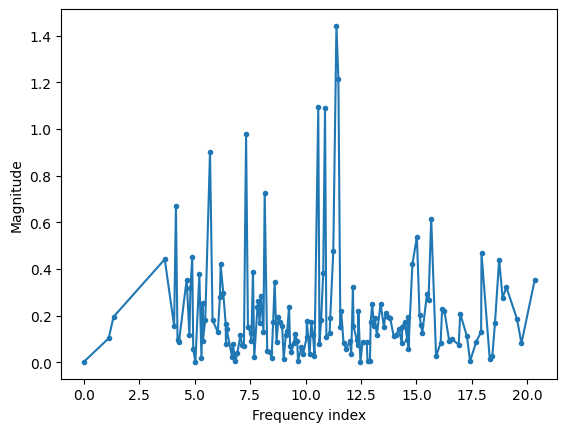

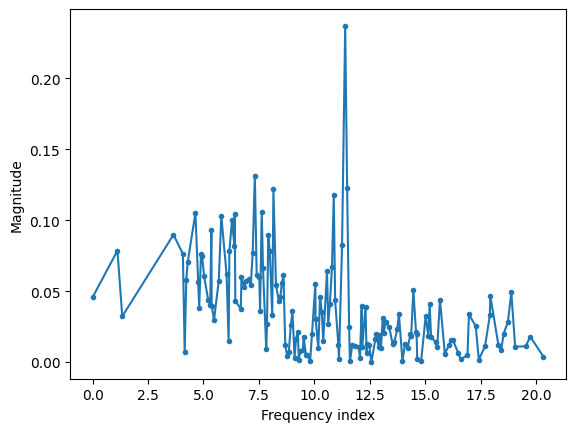

In [108]:
fig, ax = plt.subplots()
ax.plot(G.e, np.abs(f), ".-")
ax.set_xlabel("Frequency index")
ax.set_ylabel("Magnitude")

fig, ax = plt.subplots()
ax.plot(G.e, np.abs(fb), ".-")
ax.set_xlabel("Frequency index")
ax.set_ylabel("Magnitude")

fig, ax = plt.subplots()
ax.plot(G.e, np.abs(fh), ".-")
ax.set_xlabel("Frequency index")
ax.set_ylabel("Magnitude")

The application of the brick pass filter results in decreased relevance of higher frequency components with respect to no filtering, which is however unfortunately marginal. The heat kernel further reduces the relevance of higher frequency components (after having tuned $\tau$ accordingly).

> What if we repeat the heat kernel based filtering with a smaller τ or bigger τ ?

### Smaller $ \tau $

(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Heat(in=1, out=1, scale=[1.00], normalize=False)'}, xlabel="laplacian's eigenvalues (graph frequencies) $\\lambda$", ylabel='filter response $g(\\lambda)$'>)

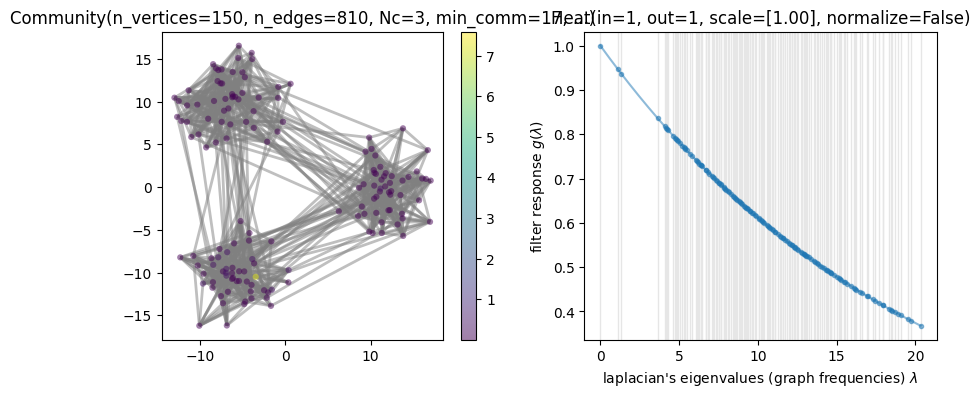

In [110]:
tau = 1
delta = 60  # define a Kronecker delta function having value 1 on node 60 and 0 elsewhere
g = filters.Heat(G, tau)  # the heat kernel defined via the graph spectral domain
s = g.localize(delta)  # the heat kernel localised at node 60 in the graph
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(s, vertex_size=20, ax=axes[0])
g.plot(ax=axes[1])

The signal is not propagating.

### Larger $ \tau $

(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Heat(in=1, out=1, scale=[30.00], normalize=False)'}, xlabel="laplacian's eigenvalues (graph frequencies) $\\lambda$", ylabel='filter response $g(\\lambda)$'>)

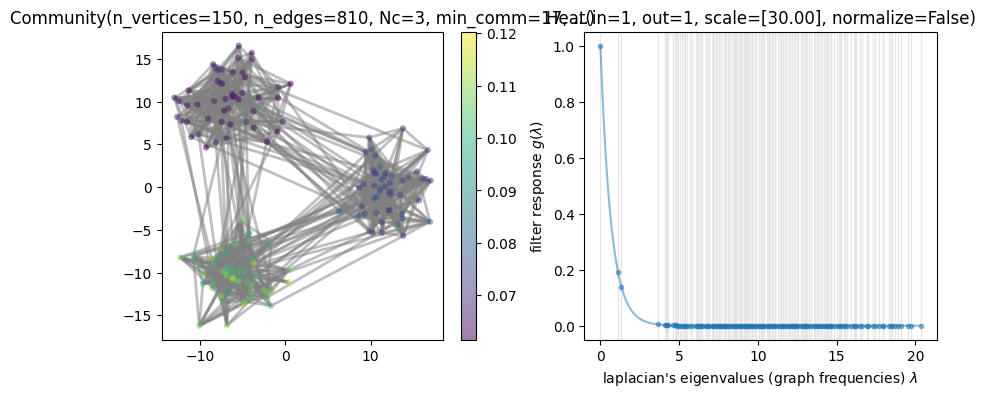

In [109]:
tau = 30
delta = 60  # define a Kronecker delta function having value 1 on node 60 and 0 elsewhere
g = filters.Heat(G, tau)  # the heat kernel defined via the graph spectral domain
s = g.localize(delta)  # the heat kernel localised at node 60 in the graph
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(s, vertex_size=20, ax=axes[0])
g.plot(ax=axes[1])

The signal is well propagated within the community of interest.

# Denoising

$$ 
\begin{equation}
\min_{\mathbf{f} \in \mathbb{R}^N} \|\mathbf{y} - \mathbf{f}\|_2^2 + \alpha\, \mathbf{f}^\top \mathbf{L} \mathbf{f},
\end{equation}
$$
> Show that the solution to the optimisation problem in Eq. (1) can be interpreted as applying a low-pass filter to the observed noisy graph signal


This is a convex quadratic problem. Taking the gradient with respect to **f** and setting it to zero:

$$
-2(\mathbf{y} - \mathbf{f}) + 2\alpha\, \mathbf{L}\mathbf{f} = 0.
$$

Rearranging terms gives:

$$
(\mathbf{I} + \alpha \mathbf{L}) \mathbf{f} = \mathbf{y},
$$

so the optimal solution is

$$
\mathbf{f}^\star = (\mathbf{I} + \alpha \mathbf{L})^{-1} \mathbf{y}.
$$


Let $\mathbf{L} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{U}^T$ be the eigendecomposition of the graph Laplacian,  
where $\mathbf{U}$ contains the eigenvectors (graph Fourier basis) and  
$\boldsymbol{\Lambda} = \text{diag}(\lambda_1, \ldots, \lambda_N)$ contains the eigenvalues.

Then, considering that $\mathbf{U}\mathbf{U}^T=\mathbf{I}$

$$
\mathbf{f}^\star = \mathbf{U} (\mathbf{I} + \alpha \boldsymbol{\Lambda})^{-1} \mathbf{U}^\top \mathbf{y}.
$$

Defining $\hat{\mathbf{y}} = \mathbf{U}^\top \mathbf{y}$ and $\hat{\mathbf{f}}^\star = \mathbf{U}^\top \mathbf{f}^\star$,  
we obtain the component-wise expression:

$$
\hat{f}^\star_i = \frac{1}{1 + \alpha \lambda_i} \, \hat{y}_i \Longleftrightarrow \hat{\mathbf{f}}^\star = (\mathbf{I} + \alpha \Lambda)^{-1} \mathbf{\hat{y}}
$$


This is the same as a low-pass filter because the matrix product with the matrix $\mathbf{U}$ projects the graph signal $\mathbf{y}$ on the Fourier basis of signals on the graph. Then, by weighting each component with the inverse of the eigenvalue (and being the eigenvalues listed magnitude-increasing order), early $\mathbf{U}^T \mathbf{y}$ products---corresponding to lower frequency components---are weighted more than higher-frequency components, justifying the low-pass filter intepretation.

> Implement the solution to Eq. (1) via the following steps:
>   1. Construct a sensor network using the class `pygsp.graphs.Sensor` in PyGSP, and compute the graph Laplacian;



2025-10-22 11:19:32,030:[DEBUG](pygsp.graphs.nngraphs.nngraph.__init__): Using scipy KDTree for k-NN search
/Users/fracapuano/miniconda3/envs/signalenv/lib/python3.12/site-packages/pygsp/plotting.py:610: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sc = ax.scatter(


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Sensor(n_vertices=64, n_edges=229, k=6, distributed=False, ...)'}>)

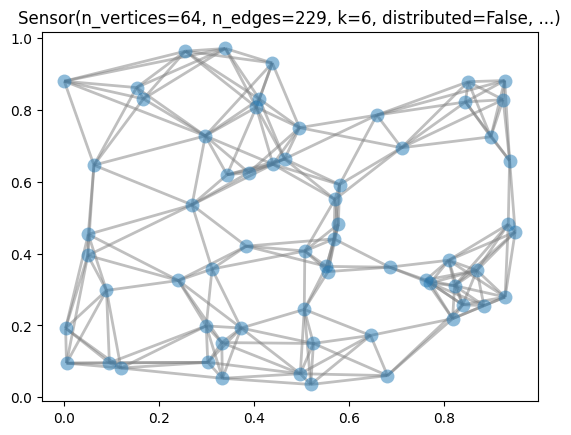

In [115]:
import pygsp
G = pygsp.graphs.Sensor()

G.plot()

(array([26.,  0., 16.,  0., 11.,  0.,  9.,  0.,  1.,  1.]),
 array([ 6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <BarContainer object of 10 artists>)

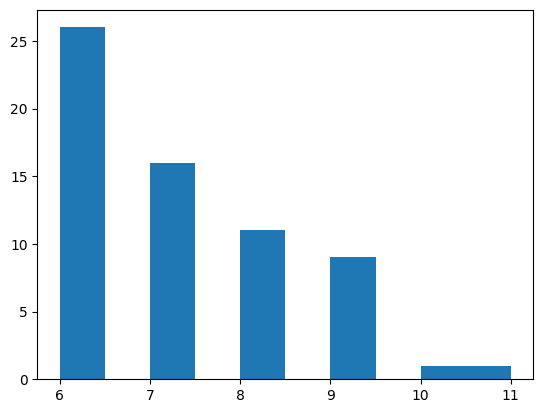

In [122]:
fig, ax = plt.subplots()
ax.hist(G.d)

Because the degree distribution is not homogeneous, using the normalized Laplacian is more appropriate.

In [124]:
G.compute_laplacian("normalized")


>   2. Construct a smooth signal on the graph, e.g., a linear combination of the first few eigenvectors of the Laplacian;


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Sensor(n_vertices=64, n_edges=229, k=6, distributed=False, ...)'}>)

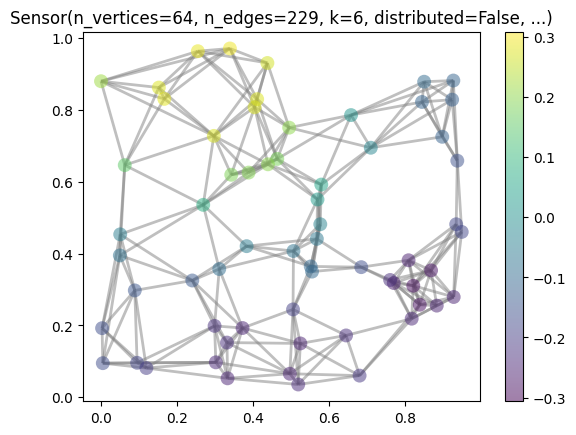

In [161]:
G.compute_fourier_basis()

n_vectors = 5
coeffs = np.random.normal(size=n_vectors)
f = G.U[:, :n_vectors] @ coeffs
G.plot_signal(f)

>   3. Add Gaussian random noise (with appropriate variance) to the smooth signal, to obtain the noisy signal;


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Sensor(n_vertices=64, n_edges=229, k=6, distributed=False, ...)'}>)

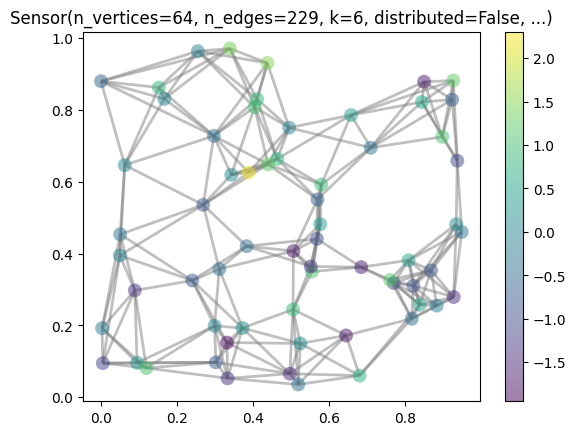

In [162]:
f_noisy = f + np.random.normal(size=G.N)
G.plot_signal(f_noisy)


>   4. Define the low-pass filter with a given $\alpha$, and apply it to the noisy signal, to obtain the denoised signal; compare the clean, noisy, and denoised signals on the graph.


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Sensor(n_vertices=64, n_edges=229, k=6, distributed=False, ...)'}>)

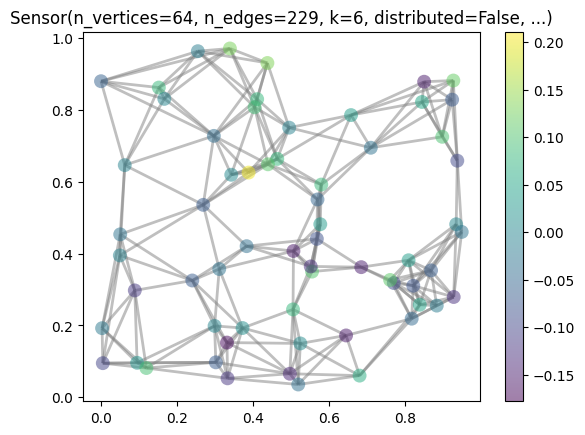

In [169]:
alpha = 10
f_star = G.U @ np.linalg.inv(G.L + alpha * np.eye(G.N)) @ G.U.T @ f_noisy

f_star = np.array(f_star).reshape(G.N,)
G.plot_signal(f_star)

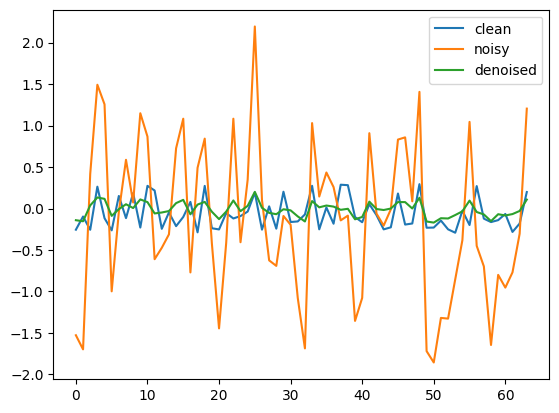

In [170]:
fig, ax = plt.subplots()

ax.plot(f, label="clean")
ax.plot(f_noisy, label="noisy")
ax.plot(f_star, label="denoised")

ax.legend()

> 5. Repeat with a different α. What is the impact of the value of α on the denoised signal? Can you find an optimal α that minimises the error between the clean and denoised signals?

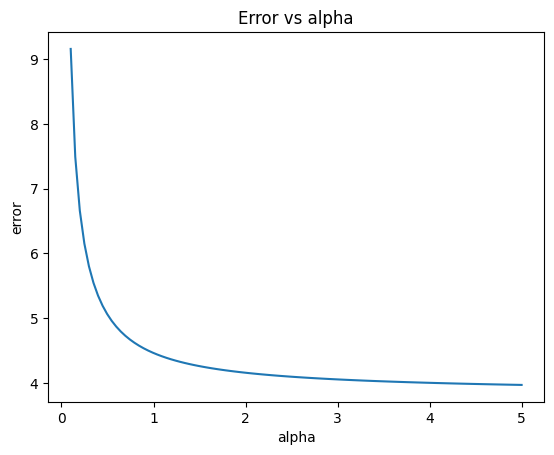

In [215]:
alphas = np.linspace(0.1, 5, 100)
errors = []
for alpha in alphas:
    f_star = G.U @ np.linalg.inv(G.L + alpha * np.eye(G.N)) @ G.U.T @ f_noisy
    errors.append(np.linalg.norm(f - f_star))

fig, ax = plt.subplots()
ax.plot(alphas, errors)
ax.set_xlabel("alpha")
ax.set_ylabel("error")
ax.set_title("Error vs alpha")
plt.show()


# Inpainting

To minimize
$$
J(\mathbf{f})=\|\mathbf{y}-\mathbf{M}\mathbf{f}\|_2^2+\alpha\,\mathbf{f}^\top\mathbf{L}\mathbf{f},
\qquad \mathbf{f}\in\mathbb{R}^N .
$$

Take the gradient and set to zero:
$$
\nabla J(\mathbf{f})=-2\mathbf{M}^\top(\mathbf{y}-\mathbf{M}\mathbf{f})+2\alpha\,\mathbf{L}\mathbf{f}=0
$$
which yields
$$
(\mathbf{M}^\top\mathbf{M}+\alpha\,\mathbf{L})\,\mathbf{f}^\star=\mathbf{M}^\top\mathbf{y}.
$$

When $\mathbf{M}^\top\mathbf{M}+\alpha\,\mathbf{L}$ is invertible
$$
\ \mathbf{f}^\star=(\mathbf{M}^\top\mathbf{M}+\alpha\,\mathbf{L})^{-1}\mathbf{M}^\top\mathbf{y}\ .
$$

If $\mathbf{L}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^\top$ (graph Laplacian eigendecomposition) and you define
$\tilde{\mathbf{M}}=\mathbf{M}\mathbf{U}$, then
$$
\mathbf{f}^\star=\mathbf{U}\,(\tilde{\mathbf{M}}^\top\tilde{\mathbf{M}}+\alpha\,\boldsymbol{\Lambda})^{-1}\tilde{\mathbf{M}}^\top\,\mathbf{y}.
$$


Does not look a filter.

> 1. Construct a sensor network using the class `pygsp.graphs.Sensor` in PyGSP, and compute the graph Laplacian

2025-10-22 14:17:46,480:[DEBUG](pygsp.graphs.nngraphs.nngraph.__init__): Using scipy KDTree for k-NN search
/Users/fracapuano/miniconda3/envs/signalenv/lib/python3.12/site-packages/pygsp/plotting.py:610: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sc = ax.scatter(


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Sensor(n_vertices=64, n_edges=241, k=6, distributed=False, ...)'}>)

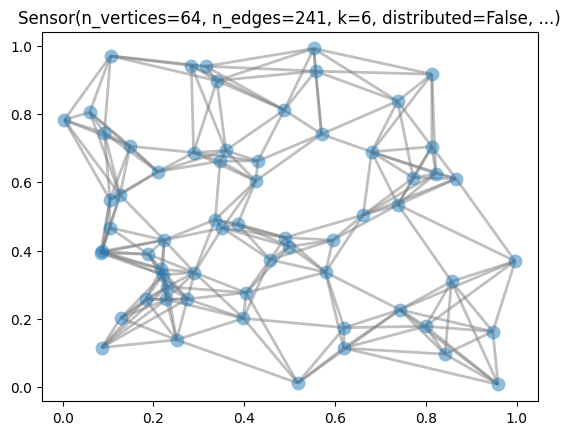

In [173]:
G = pygsp.graphs.Sensor()
G.plot()

> 2. Construct a smooth signal on the graph, e.g., a linear combination of the first few eigenvectors of the Laplacian

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Sensor(n_vertices=64, n_edges=241, k=6, distributed=False, ...)'}>)

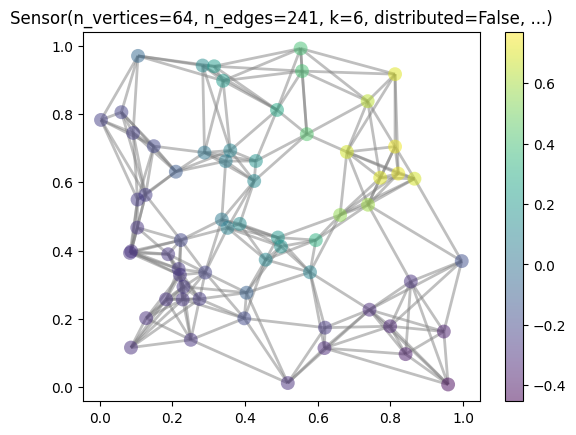

In [186]:
G.compute_fourier_basis()

n_vectors = 5
coeffs = np.random.normal(size=n_vectors)
f = G.U[:, :n_vectors] @ coeffs
G.plot_signal(f)

> 3. Scale the values of the signal to the range [0, 1] (so that missing values are easily seen);

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Sensor(n_vertices=64, n_edges=241, k=6, distributed=False, ...)'}>)

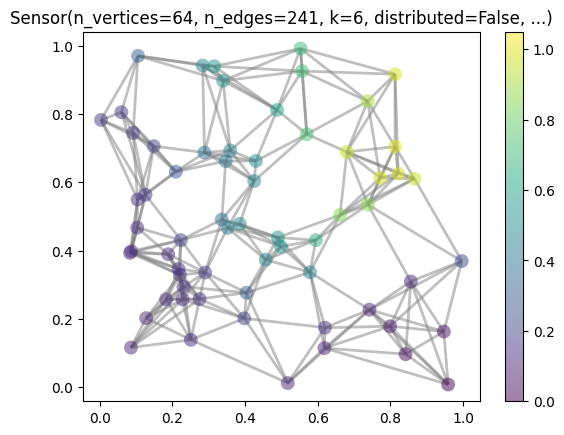

In [187]:
f = (f - f.min()) / (f.max() - f.min())
G.plot_signal(f)


> Randomly set `p = 50%` of the signal values to `0`, to obtain the partially observed signal;

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Sensor(n_vertices=64, n_edges=241, k=6, distributed=False, ...)'}>)

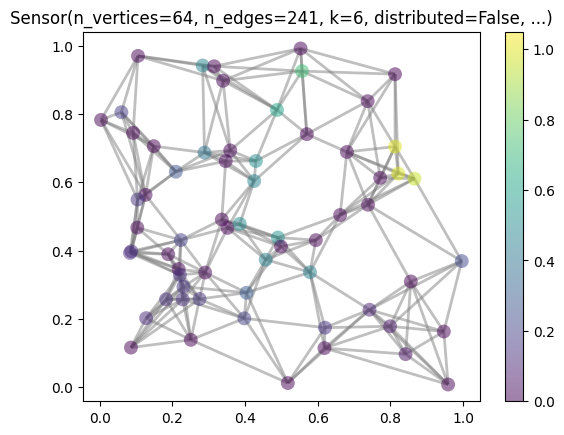

In [196]:
p = 0.5
indices = np.random.choice(G.N, size=int(p * G.N), replace=False)
f_masked = f.copy()
f_masked[indices] = 0
G.plot_signal(f_masked)


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Sensor(n_vertices=64, n_edges=241, k=6, distributed=False, ...)'}>)

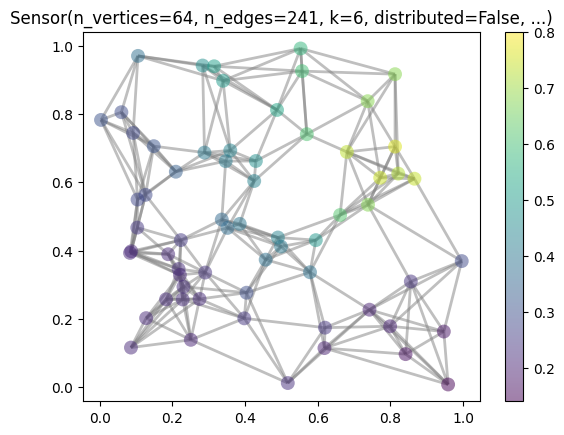

In [194]:
alpha = 1
diagonal = np.ones(G.N)
diagonal[indices] = 0
M = np.diag(diagonal)

f_inpainted = np.linalg.solve(
    M.T @ M + alpha * G.L,
    M.T @ f_masked
)

G.plot_signal(f_inpainted)

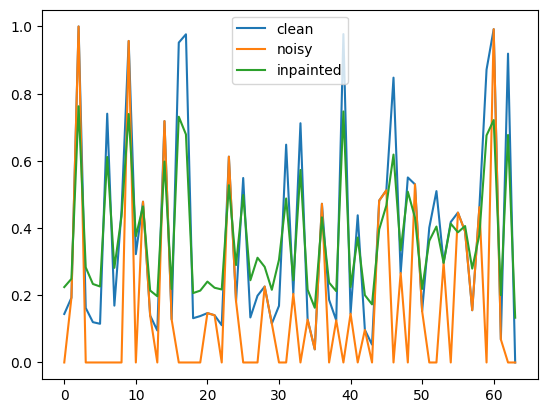

In [217]:
fig, ax = plt.subplots()
ax.plot(f, label="clean")
ax.plot(f_masked, label="noisy")
ax.plot(f_inpainted, label="inpainted")
ax.legend()
plt.show()


> Repeat with a different p and α. What is the impact of the value of p and α on the inpainted signal? How large can p be so that a reasonably recovery is still possible?

In [218]:
from tqdm import tqdm

def compute_inpainting_error(p, alpha):  
    indices = np.random.choice(G.N, size=int(p * G.N), replace=False)
    f_masked = f.copy()
    f_masked[indices] = 0
    # G.plot_signal(f_masked) # Commented out to avoid plotting many figures

    diagonal = np.ones(G.N)
    diagonal[indices] = 0
    M = np.diag(diagonal)

    f_inpainted = np.linalg.solve(
        M.T @ M + alpha * G.L,
        M.T @ f_masked
    )

    return np.linalg.norm(f - f_inpainted)

n_grid = 100
ps = np.linspace(0.01, 0.99, n_grid)
alphas = np.linspace(0.1, 5, n_grid)

errors = []
for alpha in tqdm(alphas):
    for p in ps:
        errors.append(compute_inpainting_error(p, alpha))

100%|██████████| 100/100 [00:00<00:00, 140.03it/s]


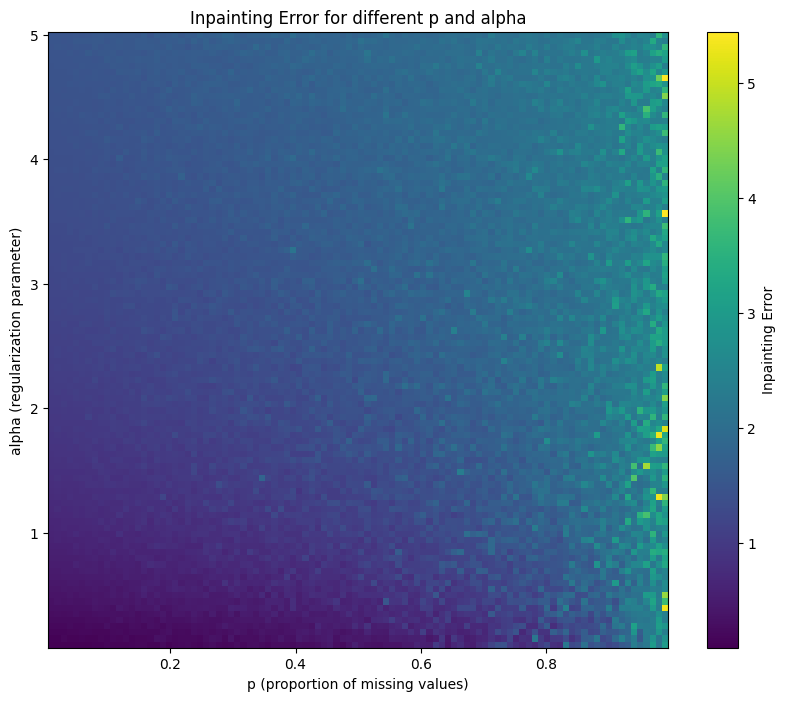

In [219]:
errors_grid = np.array(errors).reshape(len(alphas), len(ps))

fig, ax = plt.subplots(figsize=(10, 8))
mesh = ax.pcolormesh(ps, alphas, errors_grid, shading='auto', cmap='viridis')
fig.colorbar(mesh, ax=ax, label='Inpainting Error')
ax.set_xlabel('p (proportion of missing values)')
ax.set_ylabel('alpha (regularization parameter)')
ax.set_title('Inpainting Error for different p and alpha')
plt.show()
